# Network Graphs

In this python notebook various types of centrality measures will be created and visualized through graphs.

#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os

#### Indicate Data Directory Locations (This Will Vary for Each User) 

In [2]:
backup_dir = '00 Backup\\'
investor_data_dir = '01 HoldingsData\\'
subsidiary_data_dir = '02 Subsidiary Data\\'
false_positives_dir = '03 False Positives\\'
output_dir = '04 Output\\'
adj_dir = '05 Adjacency Matrix\\'
graph_output_dir = '06 Investor Network Graphs\\'
acc_dir = '07 Accounting Data\\'

#### Constant Variables

In [8]:
STARTYEAR = 2006
ENDYEAR = 2020
# YEARS = np.arange(STARTYEAR, ENDYEAR + 1)
YEARS = [2020]

INVESTORS_PAR = ['Natixis Investment Managers', 'Credit Agricole / Amundi',
       'AXA Group', 'Capital Group', 'Allianz', 'Aviva', 'BNP Paribas',
       'Bank of New York Mellon', 'Prudential', 'Bank of America',
       'Barclays', 'BlackRock', 'Legg Mason', 'Legal and General Group',
       'Credit Suisse', 'Deutsche Bank', 'Fidelity Investments',
       'Franklin Templeton', 'Goldman Sachs', 'HSBC', 'ING Group',
       'Invesco', 'JP Morgan Chase', 'Morgan Stanley', 'Nuveen',
       'Nippon Life Insurance', 'Northern Trust', 'Wellington Management',
       'State Street', 'AIG', 'T Rowe Price', 'Vanguard', 'UBS',
       'Wells Fargo']

OTHER_COLOR = 'slateblue'


### list of color names: https://matplotlib.org/3.5.0/_images/sphx_glr_named_colors_003.png
COLOR_MAP = {'BlackRock': 'black',
            'Vanguard': 'red',
            'Capital Group': 'darkblue',
            'Fidelity Investments': 'lime',
            'State Street': 'blue',
            'Natixis Investment Managers': OTHER_COLOR,
            'Credit Agricole / Amundi': OTHER_COLOR,
            'AXA Group': OTHER_COLOR,
            'Allianz': OTHER_COLOR,
            'Aviva': OTHER_COLOR,
            'BNP Paribas': OTHER_COLOR,
            'Bank of New York Mellon': OTHER_COLOR,
            'Prudential': OTHER_COLOR,
            'Bank of America': OTHER_COLOR,
            'Barclays': OTHER_COLOR,
            'Legg Mason': OTHER_COLOR,
            'Legal and General Group': OTHER_COLOR,
            'Credit Suisse': 'aqua',
            'Deutsche Bank': 'green',
            'Franklin Templeton': OTHER_COLOR,
            'Goldman Sachs': OTHER_COLOR,
            'HSBC': OTHER_COLOR,
            'ING Group': OTHER_COLOR,
            'Invesco': OTHER_COLOR,
            'JP Morgan Chase': OTHER_COLOR,
            'Morgan Stanley': OTHER_COLOR,
            'Nuveen': OTHER_COLOR,
            'Nippon Life Insurance': OTHER_COLOR,
            'Northern Trust': OTHER_COLOR,
            'Wellington Management': OTHER_COLOR,
            'AIG': OTHER_COLOR,
            'T Rowe Price': OTHER_COLOR,
            'UBS': OTHER_COLOR,
            'Wells Fargo': OTHER_COLOR}


## Drawing the Investor Network

### Degree Centrality (Subsidiary level)

2020 finished
Degree Centrality Graph finished


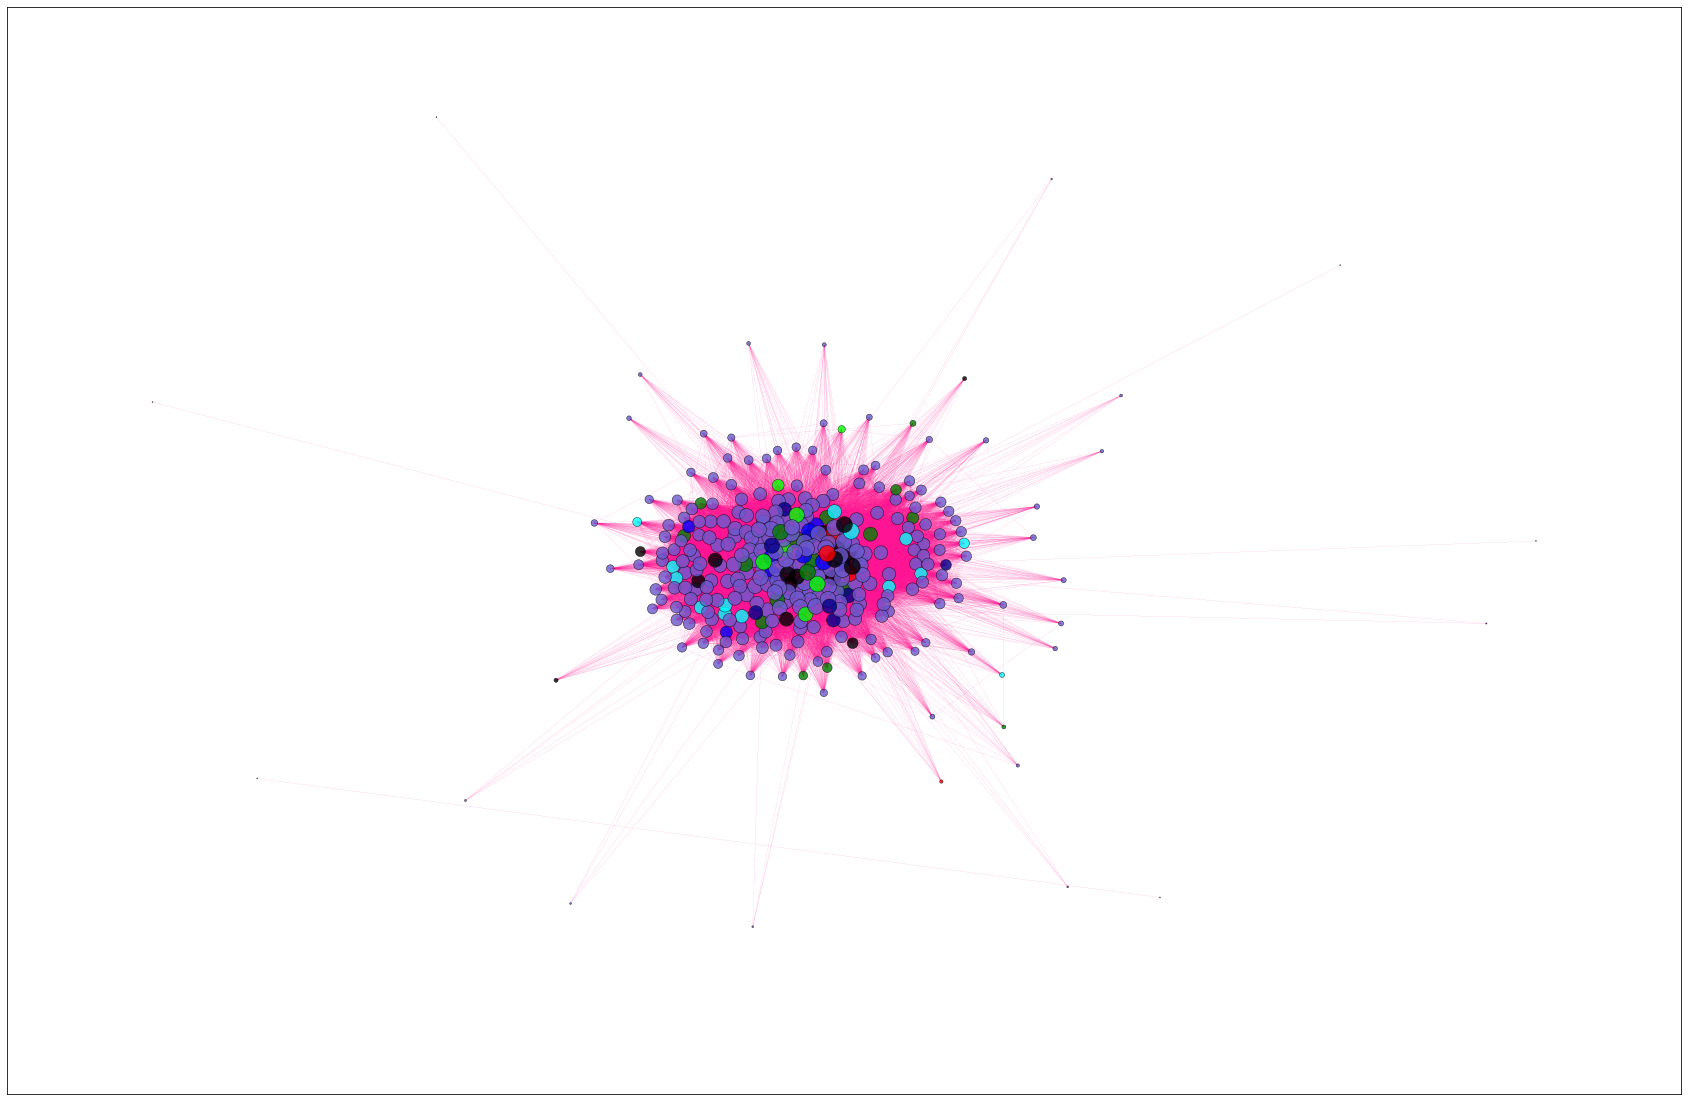

In [13]:

for year in YEARS:
    
    df = pd.read_excel(f'{adj_dir}adjacency_matrix_{year}.xlsx', index_col = 0)



    ### unique investors and their parent
    df_p = pd.read_csv(f'{output_dir}{year}_InvestorData.csv', encoding = 'latin', index_col = False)
    df_p = df_p[['InvestorFullName', 'Parent Company']]
    df_p = df_p[df_p['Parent Company'].notna()]
    df_p = df_p.drop_duplicates()



    ### sorting the unique investors on their sum of shares held
    df_o = pd.read_csv(f'{output_dir}{year}_InvestorData.csv', encoding = 'latin', index_col = False)
    df_o = df_o[['InvestorFullName', 'SharesHeldValue', 'Parent Company']]
    df_o = df_o[df_o['Parent Company'].notna()]
    df_o = df_o.groupby(['InvestorFullName']).sum('SharesHeldValue')
    df_o = df_o.sort_values('SharesHeldValue', ascending = True)


    plt.figure(figsize = (30,20))

    ### empty graph
    G = nx.Graph()

    ### adding nodes (investors)
    G.add_nodes_from(df_o.index)

    ### adding edges (connections based on 0 or 1 in adj matrix)
    s = df.stack()
    G.add_edges_from(s[s==1].index)

    ### getting the degree centrality values for nodes
    DC = nx.degree_centrality(G)
    dc = DC.values()

    ### color map
    color_map = []

    for node in G:
        for inv in INVESTORS_PAR:
            if df_p.loc[df_p['InvestorFullName'] == node, 'Parent Company'].item() == inv:
                color_map.append(COLOR_MAP.get(inv))



    pos = nx.spring_layout(G, k = 0.5)
    
    ### drawing the network
    nx.draw_networkx(G,
                     pos,
                     with_labels = False,
                     node_color = color_map,
                     node_size = [v * 300 for v in dc],
                     edgecolors = 'black',
                     width = 0.09,
                     linewidths = 0.5,
                     alpha = 0.8,
                     edge_color = 'deeppink',            
                    )


    plt.savefig(f'{graph_output_dir}investor_network_{year}.png', dpi = 500)
    
    print(f'{year} finished')
    
print('Degree Centrality Graph finished')


##### Threshold: 5%

In [10]:
# #### NEEDS CHANGE AS ACCOUNTING FIGURES ARE IN THOUSANDS
# #### NEEDS CHANGE AS ACCOUNTING FIGURES ARE IN THOUSANDS
# #### NEEDS CHANGE AS ACCOUNTING FIGURES ARE IN THOUSANDS
# #### NEEDS CHANGE AS ACCOUNTING FIGURES ARE IN THOUSANDS
# #### NEEDS CHANGE AS ACCOUNTING FIGURES ARE IN THOUSANDS


# ac = pd.read_excel(f'{acc_dir}Accounting_Data.xlsx')

# for year in YEARS:
    
#     df = pd.read_excel(f'{adj_dir}adjacency_matrix_TH5%_{year}.xlsx', index_col = 0)



#     ### unique investors and their parent
#     df_p = pd.read_csv(f'{output_dir}{year}_InvestorData.csv', encoding = 'latin', index_col = False)
    
#     ac = ac.loc[ac['year'] == year]
#     df_p = pd.merge(df_p, ac[['ISIN', 'MARKETCAPITALIZATION']], on = 'ISIN', how = 'left')
#     df_p = df_p[df_p['MARKETCAPITALIZATION'].notna()]

#     df_p = df_p[['InvestorFullName', 'Parent Company']]
#     df_p = df_p[df_p['Parent Company'].notna()]
#     df_p = df_p.drop_duplicates()



#     ### sorting the unique investors on their sum of shares held
#     df_o = pd.read_csv(f'{output_dir}{year}_InvestorData.csv', encoding = 'latin', index_col = False)
    
#     ac = ac.loc[ac['year'] == year]
#     df_o = pd.merge(df_o, ac[['ISIN', 'MARKETCAPITALIZATION']], on = 'ISIN', how = 'left')
#     df_o = df_o[df_o['MARKETCAPITALIZATION'].notna()]

#     df_o = df_o[['InvestorFullName', 'SharesHeldValue', 'Parent Company']]
#     df_o = df_o[df_o['Parent Company'].notna()]
#     df_o = df_o.groupby(['InvestorFullName']).sum('SharesHeldValue')
#     df_o = df_o.sort_values('SharesHeldValue', ascending = True)


#     plt.figure(figsize = (30,20))

#     ### empty graph
#     G = nx.Graph()

#     ### adding nodes (investors)
#     G.add_nodes_from(df_o.index)

#     ### adding edges (connections based on 0 or 1 in adj matrix)
#     s = df.stack()
#     G.add_edges_from(s[s==1].index)

#     ### getting the degree centrality values for nodes
#     DC = nx.degree_centrality(G)
#     dc = DC.values()

#     ### color map
#     color_map = []

#     for node in G:
#         for inv in INVESTORS_PAR:
#             if df_p.loc[df_p['InvestorFullName'] == node, 'Parent Company'].item() == inv:
#                 color_map.append(COLOR_MAP.get(inv))

#     pos = nx.spring_layout(G, k = 0.2)

#     ### drawing the network
#     nx.draw_networkx(G,
#                      pos,
#                      with_labels = False,
#                      node_color = color_map,
#                      node_size = [v * 700 for v in dc],
#                      edgecolors = 'black',
#                      width = 0.29,
#                      linewidths = 0.5,
#                      alpha = 0.8,
#                      edge_color = 'deeppink',            
#                     )


#     plt.savefig(f'{graph_output_dir}investor_network_TH5%_v2_{year}.png', dpi = 500)
    
#     print(f'{year} finished')
    
# print('Degree Centrality Graph finished')


##### Threshold: 2%

In [11]:
# #### NEEDS CHANGE AS ACCOUNTING FIGURES ARE IN THOUSANDS
# #### NEEDS CHANGE AS ACCOUNTING FIGURES ARE IN THOUSANDS
# #### NEEDS CHANGE AS ACCOUNTING FIGURES ARE IN THOUSANDS
# #### NEEDS CHANGE AS ACCOUNTING FIGURES ARE IN THOUSANDS
# #### NEEDS CHANGE AS ACCOUNTING FIGURES ARE IN THOUSANDS


# ac = pd.read_excel(f'{acc_dir}Accounting_Data.xlsx')

# for year in YEARS:
    
#     df = pd.read_excel(f'{adj_dir}adjacency_matrix_TH2%_{year}.xlsx', index_col = 0)



#     ### unique investors and their parent
#     df_p = pd.read_csv(f'{output_dir}{year}_InvestorData.csv', encoding = 'latin', index_col = False)
    
#     ac = ac.loc[ac['year'] == year]
#     df_p = pd.merge(df_p, ac[['ISIN', 'MARKETCAPITALIZATION']], on = 'ISIN', how = 'left')
#     df_p = df_p[df_p['MARKETCAPITALIZATION'].notna()]

#     df_p = df_p[['InvestorFullName', 'Parent Company']]
#     df_p = df_p[df_p['Parent Company'].notna()]
#     df_p = df_p.drop_duplicates()



#     ### sorting the unique investors on their sum of shares held
#     df_o = pd.read_csv(f'{output_dir}{year}_InvestorData.csv', encoding = 'latin', index_col = False)
    
#     ac = ac.loc[ac['year'] == year]
#     df_o = pd.merge(df_o, ac[['ISIN', 'MARKETCAPITALIZATION']], on = 'ISIN', how = 'left')
#     df_o = df_o[df_o['MARKETCAPITALIZATION'].notna()]

#     df_o = df_o[['InvestorFullName', 'SharesHeldValue', 'Parent Company']]
#     df_o = df_o[df_o['Parent Company'].notna()]
#     df_o = df_o.groupby(['InvestorFullName']).sum('SharesHeldValue')
#     df_o = df_o.sort_values('SharesHeldValue', ascending = True)


#     plt.figure(figsize = (30,20))

#     ### empty graph
#     G = nx.Graph()

#     ### adding nodes (investors)
#     G.add_nodes_from(df_o.index)

#     ### adding edges (connections based on 0 or 1 in adj matrix)
#     s = df.stack()
#     G.add_edges_from(s[s==1].index)

#     ### getting the degree centrality values for nodes
#     DC = nx.degree_centrality(G)
#     dc = DC.values()

#     ### color map
#     color_map = []

#     for node in G:
#         for inv in INVESTORS_PAR:
#             if df_p.loc[df_p['InvestorFullName'] == node, 'Parent Company'].item() == inv:
#                 color_map.append(COLOR_MAP.get(inv))

#     pos = nx.spring_layout(G, k = 0.2)

#     ### drawing the network
#     nx.draw_networkx(G,
#                      pos,
#                      with_labels = False,
#                      node_color = color_map,
#                      node_size = [v * 700 for v in dc],
#                      edgecolors = 'black',
#                      width = 0.29,
#                      linewidths = 0.5,
#                      alpha = 0.8,
#                      edge_color = 'deeppink',            
#                     )


#     plt.savefig(f'{graph_output_dir}investor_network_TH2%_v2_{year}.png', dpi = 500)
    
#     print(f'{year} finished')
    
# print('Degree Centrality Graph finished')


### Relative Degree Centrality (Subsidiary level)

2020 finished
Relative Degree Centrality Graph finished


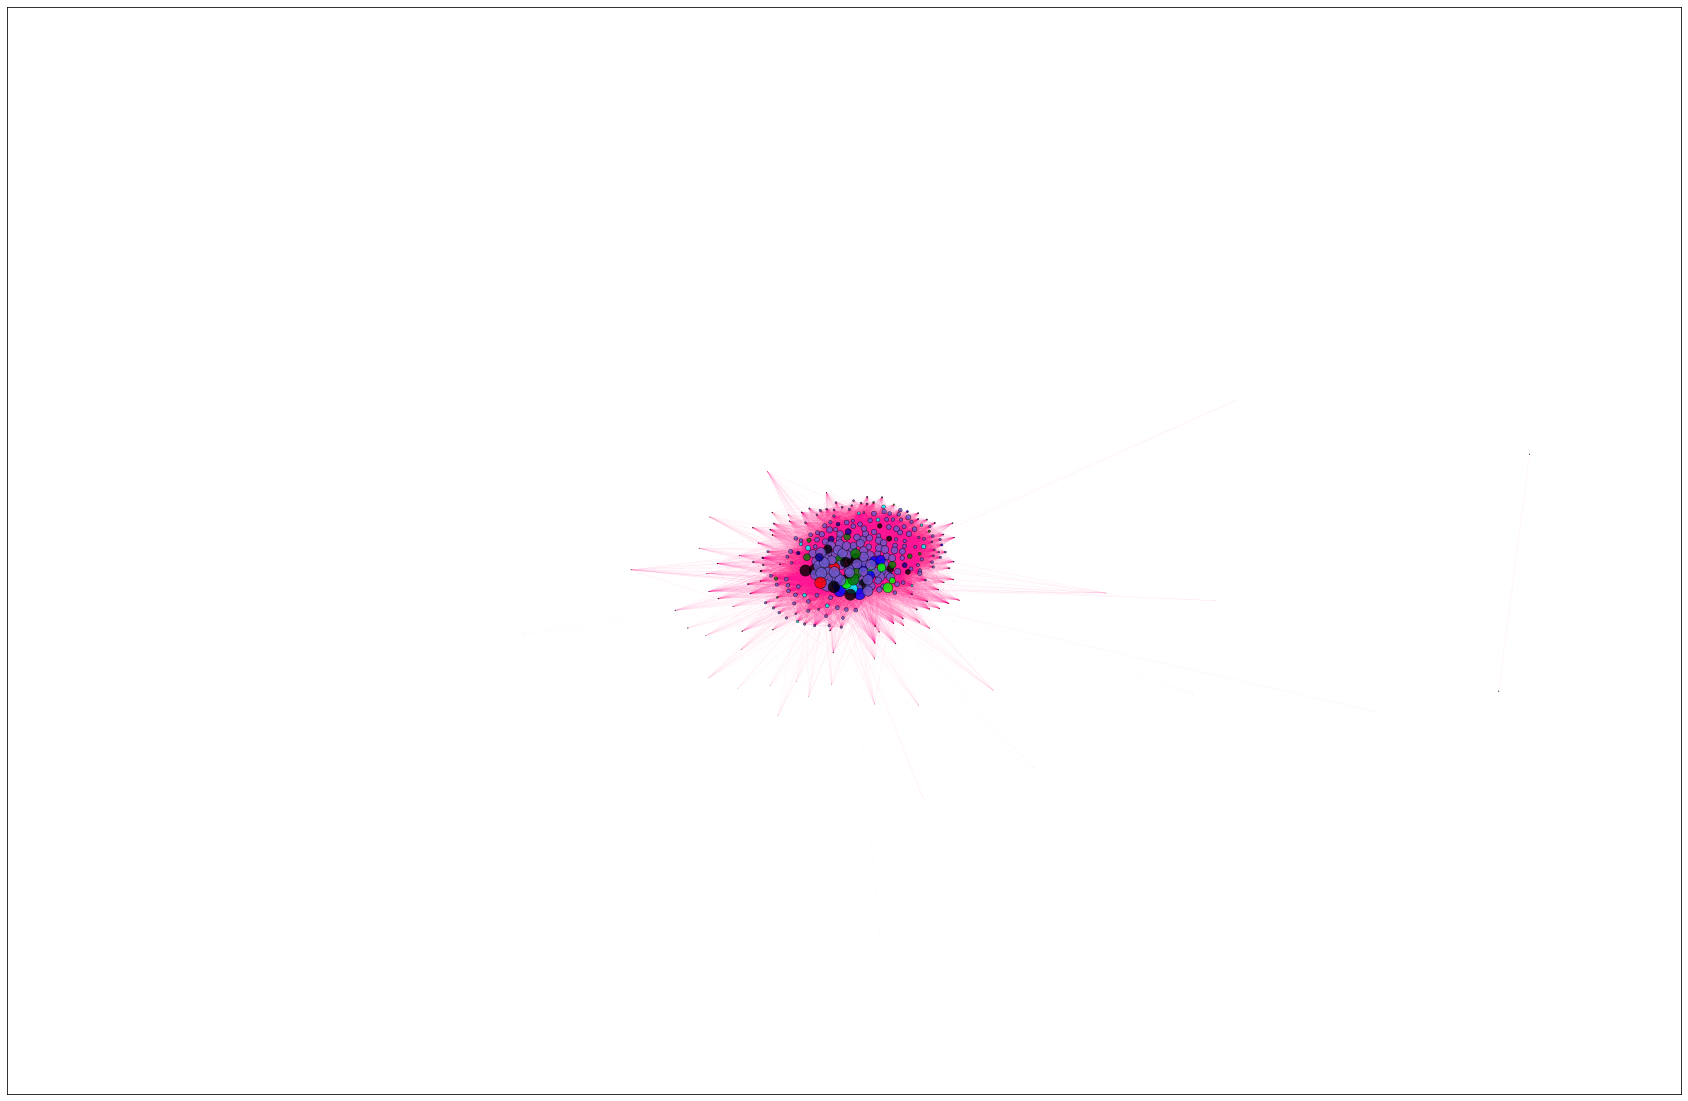

In [12]:

for year in YEARS:
    
    df2 = pd.read_excel(f'{adj_dir}adjacency_matrix_relative_{year}.xlsx', index_col = 0)



    ### unique investors and their parent
    df_p2 = pd.read_csv(f'{output_dir}{year}_InvestorData.csv', encoding = 'latin', index_col = False)
    df_p2 = df_p2[['InvestorFullName', 'Parent Company']]
    df_p2 = df_p2[df_p2['Parent Company'].notna()]
    df_p2 = df_p2.drop_duplicates()



    ### sorting the unique investors on their sum of shares held
    df_o2 = pd.read_csv(f'{output_dir}{year}_InvestorData.csv', encoding = 'latin', index_col = False)
    df_o2 = df_o2[['InvestorFullName', 'SharesHeld', 'SharesHeldValue', 'Parent Company']]
    df_o2 = df_o2[df_o2['Parent Company'].notna()]
    df_o2 = df_o2[df_o2.SharesHeldValue != 0]
    df_o2 = df_o2[df_o2.SharesHeld != 0]
    df_o2 = df_o2.groupby(['InvestorFullName']).sum('SharesHeldValue')
    df_o2 = df_o2.sort_values('SharesHeldValue', ascending = True)


    plt.figure(figsize = (30,20))

    ### empty graph
    G2 = nx.Graph()

    ### adding nodes (investors)
    G2.add_nodes_from(df_o2.index)

    ### adding edges (connections based on 0 or 1 in adj matrix)
    s2 = df2.stack()
    G2.add_edges_from(s2[s2!=0].index)
    edge_strength = s2[s2!=0].values

    ### getting the degree centrality values for nodes
    DC2 = nx.degree_centrality(G2)
    ### replacing the DC values with the RDCs:
    for k, v in DC2.items():
        DC2[k] = (df2[k].sum() / (len(df2[k]) - 1))
        
    dc2 = DC2.values()

    ## color map
    color_map2 = []

    for node in G2:
        for inv in INVESTORS_PAR:
            if df_p2.loc[df_p2['InvestorFullName'] == node, 'Parent Company'].item() == inv:
                color_map2.append(COLOR_MAP.get(inv))



    pos = nx.spring_layout(G2, k = 0.3)
    
    ### drawing the network
    nx.draw_networkx(G2,
                     pos,
                     with_labels = False,
                     node_color = color_map2,
                     node_size = [v * 150 for v in dc2],
                     edgecolors = 'black',
                     width = [y / 20 for y in edge_strength],
                     linewidths = 0.5,
                     alpha = 0.8,
                     edge_color = 'deeppink',      
                    )


    plt.savefig(f'{graph_output_dir}investor_network_relative_{year}.png', dpi = 500)
    
    print(f'{year} finished')


print('Relative Degree Centrality Graph finished')
